<a href="https://colab.research.google.com/github/antndlcrx/Intro-to-Python-DPIR/blob/main/Week%206/W6_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/logo_dpir.png?raw=true:,  width=35" alt="My Image" width=175>  

# Week 6: Machine Learning Libraries

Welcome to Week 6! This session marks the beginning of the **applications** part of the course. Over the first five weeks you built a solid foundation: Python syntax, NumPy arrays, Pandas DataFrames, data visualisation, and object-oriented programming. You can now read, write, and understand Python code at an introductory-to-intermediate level.

Starting this week, we shift focus to **applying** those skills with specialised libraries. Today we cover two complementary approaches to machine learning in Python:

- **Scikit-learn**: the standard library that gives you fine-grained control over every step of the ML workflow
- **AutoGluon**: an automated ML library that lets you train high-quality models with minimal code, ideal for researchers who want to focus on their substantive questions


## What We'll Learn Today

1. **ML terminology**: features, targets, samples, and how they map to what you know from statistics
2. **Scikit-learn walkthrough**: the Estimator API, regression, data splitting, metrics, preprocessing, and pipelines
3. **Cross-validation and grid search**: systematic model tuning
4. **AutoGluon**: automated ML for streamlined research workflows


### How This Connects

This week is where your Python toolkit meets real research applications:

```
Week 1: Python fundamentals (variables, loops, functions)
    ↓
Week 2: NumPy (arrays, vectorisation, broadcasting)
    ↓
Week 3: Pandas (DataFrames, real-world data)
    ↓
Week 4: Visualisation (plotting your DataFrames)
    ↓
Week 5: Python Classes (OOP, structuring complex code)
    ╠══════════════════════════════════════════════╗
    ║          APPLICATIONS PART BEGINS            ║
    ╠══════════════════════════════════════════════╝
    ↓
Week 6: ML Libraries (scikit-learn, AutoGluon)  ← YOU ARE HERE
    ↓
Week 7: NLP (word embeddings, Gensim, spaCy)
    ↓
Week 8: Coding agents
```

Everything you learned transfers directly:
- **NumPy arrays** are the data format scikit-learn expects under the hood
- **Pandas DataFrames** are how you load, clean, and prepare data before modelling
- **Visualisation** helps you evaluate model performance and diagnose issues
- **Classes and OOP** are how scikit-learn organises its estimators, transformers, and pipelines


## **1**.&nbsp; Why Scikit-Learn?

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/W6/Scikit_learn_logo_small.png?raw=true:,  width=25" alt="My Image" width=175>

Scikit-learn is one of the most widely used Python libraries for machine learning. It offers a clean, consistent API that simplifies tasks like data preprocessing, model selection, and evaluation. Scikit-learn supports a broad range of algorithms (classification, regression, clustering, and more) and integrates seamlessly with libraries like NumPy and Pandas. It is also a very well-documented and well-maintained library.

See:
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html#user-guide)
- [Examples](https://scikit-learn.org/stable/auto_examples/index.html)


### A Reminder on Machine Learning

[**Supervised Learning**](https://scikit-learn.org/stable/supervised_learning.html)  
Supervised learning algorithms learn from labeled data where each sample has a known target output. They seek to predict or categorize new data based on patterns learned from these labels.  
- **Classification** focuses on predicting discrete categories or classes (e.g., democratic vs. autocratic).  
- **Regression** predicts continuous values (e.g., GDP per capita).

[**Unsupervised Learning**](https://scikit-learn.org/stable/unsupervised_learning.html)  
Unsupervised learning deals with unlabeled data. The algorithms aim to discover hidden structures or patterns without predefined targets.  
- **Clustering** groups similar samples together (e.g., grouping countries by governance indicators).  
- **Dimensionality Reduction** simplifies data by reducing its number of features while retaining important information.

**Semi-Supervised Learning**  
Combines both labeled and unlabeled data. Useful when obtaining labels for every data point is costly or time-consuming.


## **2**.&nbsp; Scikit-Learn Walkthrough

In this section, we will walk through the core scikit-learn workflow together, step by step. Follow along and run each cell. We will cover the Estimator API, regression, data splitting, metrics, preprocessing, and pipelines in one guided sequence.


### Data and Terminology

In ML, you might find people use slightly different terminology to what you were used to in statistics. Variables are called **features** (your columns in the DataFrame). **Example** or **sample** is how people refer to an individual data point (your dataset row). The data table containing information on all features for all examples is the **feature matrix**. The feature we are predicting is called the **target** (your dependent variable).


In [2]:
!git clone https://github.com/antndlcrx/Intro-to-Python-DPIR.git

Cloning into 'Intro-to-Python-DPIR'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 191 (delta 45), reused 54 (delta 34), pack-reused 120 (from 1)
Receiving objects: 100% (191/191), 3.91 MiB | 21.52 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
qog_link = '/content/Intro-to-Python-DPIR/datasets/qog2022.csv'
qog = pd.read_csv(qog_link)
qog.head()

,country,region,iso3c,perc_wip,gdp_pc,corruption,hdi,glob_index,fh_polity,fh_status
0,Afghanistan,Asia,AFG,27.868853,1934.555054,0.908,0.509,38.519566,3.500000,Not Free
1,Albania,Europe,ALB,27.857143,11104.166016,0.796,0.792,66.650490,8.083333,Partly Free
2,Algeria,Africa,DZA,25.757576,14228.025391,0.714,0.746,56.150364,4.250000,Not Free
3,Andorra,Europe,AND,32.142857,NaN,NaN,0.867,50.380840,10.000000,Free
4,Angola,Africa,AGO,30.454546,7771.441895,0.629,0.582,42.808849,3.250000,Not Free


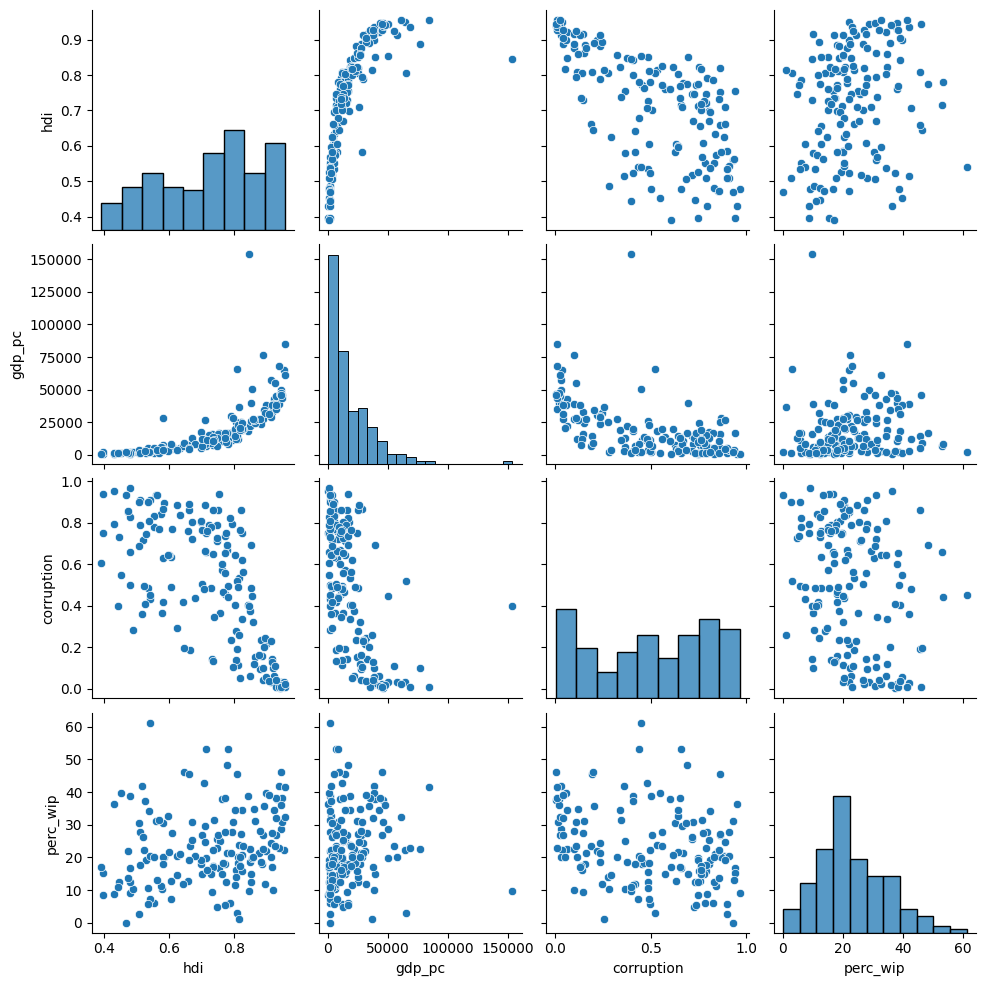

In [5]:
# Explore relationships between a few numeric columns
cols_to_plot = ['hdi', 'gdp_pc', 'corruption', 'perc_wip']
sns.pairplot(qog[cols_to_plot].dropna());

### The Estimator API

Every algorithm in scikit-learn is implemented as a class with a consistent set of methods: primarily `fit()`, `predict()`, and (for some models) `transform()`. The typical workflow is:

1. **Choose a Model Class** and import it.
2. **Instantiate the Model** with desired hyperparameters.
3. **Arrange Data** into a feature matrix (X) and a target vector (y).
    - X is usually a 2D array of shape (`n_samples`, `n_features`)
4. **Fit the Model** to your training data.
5. **Apply the Model** to new data.

If you recall OOP from Week 5, every scikit-learn model is simply a class. You create an instance, call `.fit()` to learn from data, and `.predict()` to generate predictions.


### Step 1: A First Regression Model

Let's predict the Human Development Index (HDI) from other features in the QOG dataset. Follow along:


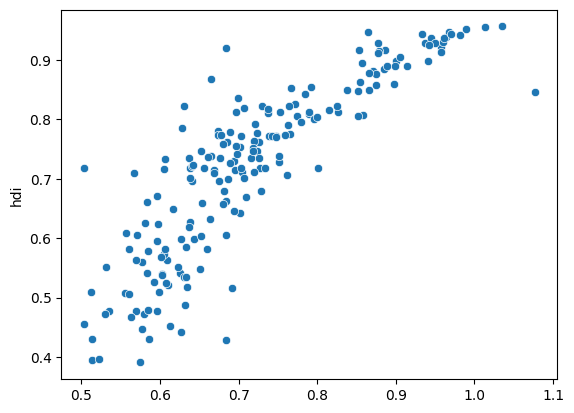

In [12]:
qog.head(5
         )

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

model = LinearRegression()

X = qog.drop(["hdi", "country", "region", "iso3c", "fh_status"], axis=1) # all of these variables are dropped
y = qog['hdi']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

model.fit(X, y)

preds = model.predict(X)
sns.scatterplot(x=preds, y=y); # both HDI, its just that X is the predicted HDI versus y in reality

In [ ]:
# Choose and import a model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
mod = KNeighborsRegressor(n_neighbors=3)

# Arrange data into X (features) and y (target)
X = qog.drop(["hdi", "country", "region", "iso3c", "fh_status"], axis=1)
y = qog["hdi"]

# Handle missing values (simple approach for now)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Fit the model
mod.fit(X, y)

# Predict
preds = mod.predict(X)

# Evaluate visually
sns.scatterplot(x=preds, y=y);

The `fit()` command causes model-dependent internal computations to take place. The results are stored in model-specific attributes. In scikit-learn, by convention all parameters learned during fit have trailing underscores (e.g., `mod.coef_`, `mod.intercept_` for linear regression).

Note: scikit-learn does not give you uncertainty estimates for model parameters. The library's focus is on prediction. If you need statistical inference, refer to the [statsmodels library](https://www.statsmodels.org/stable/index.html).


### Step 2: Data Splitting

We just trained *and* evaluated on the same data, which can hide overfitting. A critical step is splitting your dataset into a **training set** (used to fit the model) and a **test set** (used to evaluate generalisation). If the model performs well on training data but poorly on the test set, it has memorised the training data rather than learned generalisable patterns.


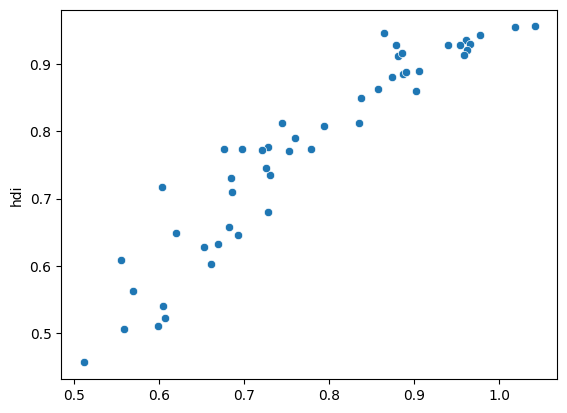

In [13]:
from sklearn.model_selection import train_test_split

mod = LinearRegression()

X = qog.drop(["hdi", "country", "region", "iso3c", "fh_status"], axis=1)
y = qog["hdi"]

# Split: 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Handle missing values in each split separately
X_train = X_train.fillna(X_train.mean()) # if we handle missing data pre-split, the information from the test beta (that is unseen and unavailable), then there's a mix
X_test = X_test.fillna(X_test.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

# Fit on training data, predict on test data
mod.fit(X_train, y_train)
preds = mod.predict(X_test)

sns.scatterplot(x=preds, y=y_test);

### Step 3: Performance Metrics

Evaluating your model with the right metric is crucial. Different tasks and data characteristics require different metrics.

**Regression Metrics**

**[Mean Squared Error (MSE)](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)**
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
Penalises large errors more heavily than small ones (due to squaring).

**[Mean Absolute Error (MAE)](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)**
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y}_i \rvert$$
Average deviation from actual values. More robust to outliers than MSE.

**[$R^2$ Score](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score)**
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
Proportion of variance in $y$ explained by the model. A value of 1 is a perfect fit, while negative values mean the model is worse than predicting the mean.

**Classification Metrics**

**[Accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)**
$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
Proportion of samples correctly predicted. Good for balanced datasets, but can be misleading for imbalanced classes.

**[Precision](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)**
$$\text{Precision} = \frac{TP}{TP + FP}$$
Of all predicted positives, how many are truly positive? Useful when false positives are costly.

**[Recall](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)**
$$\text{Recall} = \frac{TP}{TP + FN}$$
Of all actual positives, how many did we find? Important when missing positives is costly.

**[F1 Score](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)**
$$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
Harmonic mean of Precision and Recall, balancing both in one metric.

> **Note**: For multi-class problems, specify `average="macro"`, `average="weighted"`, etc.

Choose metrics relevant to your problem. A 90% accuracy can be misleading if your classes are highly imbalanced. Using more than one metric often gives a more complete picture.


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, preds))
print("R^2:", r2_score(y_test, preds))



MSE: 0.002339792957665653
R^2: 0.882004242917787


### Step 4: Data Preprocessing

[Data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) ensures models work efficiently with real-world data. Scikit-learn provides tools for:

**Scaling**: `StandardScaler` (zero mean, unit variance) and `QuantileTransformer` (uniform/normal distribution). Many algorithms work better when features are on similar scales.

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)   # fit + transform on train
X_test_scaled = scaler.transform(X_test)    # only transform on test!
```

**Encoding categorical data**: `OneHotEncoder` converts categories into binary columns (like dummy variables).

**Imputing missing data**: `SimpleImputer` fills missing values using strategies like `'mean'`, `'median'`, `'most_frequent'`, or `'constant'`.

**Feature engineering**: `PolynomialFeatures` generates polynomial and interaction terms for capturing non-linear relationships.


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mod_knn = KNeighborsRegressor(n_neighbors=5)

y = qog["hdi"]
X = qog.drop(["country", "region", "iso3c", "fh_status", "hdi"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Impute then scale
X_train = X_train.fillna(X_train.mean())
X_train = scaler.fit_transform(X_train)     # fit on train

X_test = X_test.fillna(X_test.mean())
X_test = scaler.transform(X_test)            # transform only on test!

y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

mod_knn.fit(X_train, y_train)
preds = mod_knn.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("R^2:", r2_score(y_test, preds))


MSE: 0.0019330649492025102
R^2: 0.9025155360764048


### Step 5: Pipeline

A Pipeline chains preprocessing steps and model training together, ensuring consistency and preventing data leakage. Each step is a transformer or estimator. Once defined, the entire pipeline is treated like a single model.

```python
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('step_name_1', transformer_1),
    ('step_name_2', transformer_2),
    ('model', estimator)
])
```

For more info, see [Pipeline docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and [ColumnTransformer docs](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) for handling different column types.


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = qog.drop(["hdi", "country", "region", "iso3c", "fh_status"], axis=1)
y = qog["hdi"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

# Pipeline: impute -> scale -> model
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

print("Pipeline MSE:", mean_squared_error(y_test, preds))
print("Pipeline R^2:", r2_score(y_test, preds))


Pipeline MSE: 0.0018900940160264086
Pipeline R^2: 0.9046825602039164


## **3**.&nbsp; Cross-Validation and Grid Search

Machine learning models often have hyperparameters (e.g., `n_neighbors` in k-NN) that significantly impact performance. Instead of manually guessing these values, [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html) help find the best combination automatically.

**Cross-Validation (CV)** evaluates model performance by splitting data into multiple training and validation subsets. In k-fold CV, the dataset is divided into k folds, and the model is trained k times, each time using a different fold as the validation set.

**GridSearchCV** systematically tests multiple hyperparameter combinations using cross-validation and selects the best one:

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    "<step>__<parameter>": [value1, value2, ...],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)
```


In [19]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# First, let's see cross-validation scores
X = qog.drop(["hdi", "country", "region", "iso3c", "fh_status"], axis=1)
y = qog["hdi"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
print("CV R^2 Scores:", cv_scores)
print("Mean R^2:", cv_scores.mean())


CV R^2 Scores: [0.6024366  0.76431027 0.63143364 0.78889832 0.64496714]
Mean R^2: 0.6864091930582085


In [20]:
# Now grid search over hyperparameters
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'scaler': [StandardScaler(), None]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)


Best Parameters: {'knn__n_neighbors': 7, 'scaler': None}
Best R^2 Score: 0.7600251413665046


---

## Exercises

Now it's your turn. Use what we covered above to solve these on your own. Solutions are at the end of the notebook.


### Exercise 1: Regression with gdp_pc

Use `gdp_pc` as the target. Build a pipeline (imputer, scaler, model of your choice), evaluate with MSE and R-squared, and experiment with different models or scaling options.


In [27]:
y = qog['gdp_pc']
X = qog.drop(["gdp_pc", "country", "region", "iso3c", "fh_status"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("Pipeline R^2:", r2_score(y_test, preds))

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
print("CV R^2 Scores:", cv_scores)
print("Mean R^2:", cv_scores.mean())

MSE: 138009851.13444924
Pipeline R^2: 0.5661960018119856
CV R^2 Scores: [0.63041175 0.30589738 0.59751646 0.76845555 0.23732145]
Mean R^2: 0.5079205163193002


### Exercise 2: Grid Search Tuning

Take your pipeline from Exercise 1 and use `GridSearchCV` to find the best hyperparameters.


In [30]:
# Exercise 2
# 2a. Define a param_grid (e.g., vary n_neighbors, try different scalers)
# 2b. Run GridSearchCV with cv=5
# 2c. Print the best parameters and best score

param_grid = {
    "<step>__<parameter>": [n, value2, ...],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (ipython-input-3265882521.py, line 7)

### Exercise 3: Classification

Predict `fh_status` (Freedom House classification: Free, Partly Free, Not Free) from the QOG data. Remember to remove `fh_polity` (its continuous equivalent) from your features.


In [35]:
# Exercise 3
# 3a. Prepare X and y (target = 'fh_status', drop fh_polity from features)
# 3b. Drop rows where fh_status is missing
# 3c. Pick a classification estimator (e.g., LogisticRegression,
#     KNeighborsClassifier, or RandomForestClassifier)
# 3d. Build a pipeline, use GridSearchCV
# 3e. Evaluate with accuracy and f1_score on the test set
#
# Hints:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

qog_clf = qog.drop(["country", "iso3c", "fh_polity"], axis=1)
qog_clf = qog_clf.dropna(subset=['fh_status'])

mod = KNeighborsRegressor(n_neighbors=5)

y = qog_clf["fh_status"]
x = qog_clf.drop(["fh_status", "region"], axis=1)

pipeline = Pipeline([
("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)


Best Parameters: {'imputer__strategy': 'median', 'knn__n_neighbors': 9, 'scaler': StandardScaler()}
Best R^2 Score: 0.5116830033147197


---

## **4**.&nbsp; AutoGluon: Automated Machine Learning

<img src="https://raw.githubusercontent.com/autogluon/autogluon/master/docs/_static/autogluon.png" width=200>

So far we built ML workflows step by step with scikit-learn: choosing models, preprocessing data, tuning hyperparameters. This gives you full control and understanding. But what if you just need a good prediction and want to focus on your research question?

**AutoGluon** is an open-source automated machine learning (AutoML) library developed by AWS. Its core philosophy: you provide the data and specify what to predict, and AutoGluon handles everything else (model selection, hyperparameter tuning, feature engineering, ensembling).

For social science researchers, this is particularly useful because it lets you focus on research design, data collection, and substantive interpretation rather than the engineering details of model optimisation.

See:
- [AutoGluon Documentation](https://auto.gluon.ai/stable/index.html)
- [GitHub Repository](https://github.com/autogluon/autogluon)


### Scikit-learn vs. AutoGluon

| Step | scikit-learn | AutoGluon |
|---|---|---|
| Choose model | You pick manually | Trains many models automatically |
| Preprocess data | You build pipeline | Handles it internally |
| Tune hyperparameters | You set up GridSearchCV | Automatic |
| Ensemble models | You code it yourself | Built-in stacking/bagging |
| Evaluate | You compute metrics | `.leaderboard()` shows all results |

The tradeoff: scikit-learn gives you more control and transparency, AutoGluon gives you speed and often better out-of-the-box performance. In practice, many researchers use both: AutoGluon for quick baselines, scikit-learn for fine-grained analysis.


### AutoGluon Modules

AutoGluon has three main modules, each targeting a different data type:

**`autogluon.tabular`**: for structured/tabular data. Most relevant for social science research. Trains and ensembles models like gradient boosted trees (LightGBM, XGBoost, CatBoost), neural networks, k-NN, and random forests.

**`autogluon.timeseries`**: for time series forecasting (election polling over time, economic indicators, conflict event sequences).

**`autogluon.multimodal`**: for mixed data types (text, images, and tabular data combined).

We will focus on `autogluon.tabular` since it maps directly to the kind of data analysis you do in political science.


### The Core Workflow

The central class is `TabularPredictor`. The workflow is remarkably simple:

```python
from autogluon.tabular import TabularPredictor

# 1. Create a predictor, specifying which column to predict
predictor = TabularPredictor(label='target_column')

# 2. Fit on training data (a Pandas DataFrame or CSV path)
predictor.fit(train_data)

# 3. Predict
predictions = predictor.predict(test_data)
```

Behind the scenes, AutoGluon will:
- Detect whether the task is classification or regression (based on the target column)
- Handle missing values and categorical encoding
- Train multiple models (gradient boosted trees, neural networks, etc.)
- Perform hyperparameter tuning
- Create an ensemble of the best models

Notice how this mirrors the scikit-learn Estimator API: you still `fit()` and `predict()`. The difference is that AutoGluon handles model selection and tuning for you.


### Key Parameters

**`label`**: the name of the target column. The only required argument.

**`eval_metric`**: the metric to optimise. AutoGluon picks a sensible default (accuracy for classification, RMSE for regression), but you can override it (e.g., `eval_metric='f1'`, `eval_metric='r2'`).

**`presets`**: controls the quality/speed tradeoff. Options include `'medium'` (default, good balance), `'best'` (maximises accuracy), and `'extreme'` (state-of-the-art, may take a long time).

**`time_limit`**: maximum training time in seconds.

### Useful Methods

```python
predictor.leaderboard(test_data)        # compare all trained models
predictor.evaluate(test_data)            # evaluate on test data
predictor.feature_importance(test_data)  # which features matter most
```


In [ ]:
# Install AutoGluon (may take a minute)
!pip install -q autogluon

In [ ]:
from autogluon.tabular import TabularPredictor

### AutoGluon Walkthrough: Predicting HDI

Let's try AutoGluon on the same QOG dataset. Notice how much simpler the workflow is compared to our scikit-learn pipeline.


In [ ]:
# Prepare data
qog_ml = qog.drop(['country', 'iso3c'], axis=1).copy()

train_data, test_data = train_test_split(qog_ml, test_size=0.25, random_state=42)

In [ ]:
# Train: AutoGluon handles missing values, encoding, model selection, etc.
predictor = TabularPredictor(
    label='hdi',
    eval_metric='r2'
).fit(
    train_data,
    time_limit=120,       # 2 minutes
    presets='medium'
)

In [ ]:
# Leaderboard: which model performed best?
predictor.leaderboard(test_data)

In [ ]:
# Evaluate and predict
print(predictor.evaluate(test_data))

preds_ag = predictor.predict(test_data)
preds_ag.head()

In [ ]:
# Feature importance
predictor.feature_importance(test_data)

### Exercise 4: AutoGluon Classification

Use AutoGluon to predict `fh_status`. Compare the results with your scikit-learn solution from Exercise 3.


In [ ]:
# Exercise 4
# 4a. Prepare data: drop 'fh_polity' and rows where fh_status is missing
# 4b. Split into train and test
# 4c. Create a TabularPredictor with label='fh_status'
# 4d. Fit with time_limit=120
# 4e. Display the leaderboard
# 4f. How does this compare to your sklearn pipeline?


### When to Use Which?

**Use scikit-learn when:**
- You need to understand exactly what the model is doing at each step
- You are learning ML concepts (like we are in this course)
- You need a specific, custom pipeline for your research
- Reproducibility and full control over every decision matters

**Use AutoGluon when:**
- You want the best prediction with minimal setup
- You need a quick baseline to see if ML adds value to your research question
- You want to compare many models without writing separate code for each
- Your priority is the substantive research, not the ML engineering

Many researchers start with AutoGluon for a quick baseline and feature importance, then use scikit-learn to build more interpretable or customised models.


---

## Homework

Read the description and download the [Credit Card Fraud Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Your task is to predict the `Class` feature, which records whether a transaction is credit card fraud or a legitimate transaction.

**Part A (scikit-learn):**
Implement data preprocessing, choose an estimator, and pick appropriate metrics. The decision of how to organise the pipeline (including sample splitting and grid search) is entirely up to you.

**Part B (AutoGluon):**
Use AutoGluon to predict the same target. Compare the leaderboard results with your scikit-learn solution.

Think carefully about which metrics make sense here. Hint: the dataset is highly imbalanced (very few fraud cases relative to legitimate transactions). What does this mean for your choice of evaluation metric?


## Summary

| Concept | What You Learned |
|---|---|
| Estimator API | Consistent `fit()` / `predict()` interface across all scikit-learn models |
| Train-Test Split | Separating data to evaluate generalisation |
| Metrics | MSE, MAE, R-squared for regression; Accuracy, Precision, Recall, F1 for classification |
| Preprocessing | StandardScaler, OneHotEncoder, SimpleImputer |
| Pipeline | Chaining preprocessing and modelling steps together |
| Cross-Validation | Robust performance estimation using k-fold splits |
| Grid Search | Systematic hyperparameter tuning with `GridSearchCV` |
| AutoGluon | Automated ML via `TabularPredictor`: train many models with minimal code |


---

## Solutions


In [ ]:
#@title Solution: Exercise 1

y = qog["gdp_pc"]
X = qog.drop(["gdp_pc", "country", "region", "iso3c", "fh_status"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("R^2:", r2_score(y_test, preds))

# Try LinearRegression instead
pipe_lr = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
pipe_lr.fit(X_train, y_train)
preds_lr = pipe_lr.predict(X_test)
print("\nLinearRegression MSE:", mean_squared_error(y_test, preds_lr))
print("LinearRegression R^2:", r2_score(y_test, preds_lr))


In [ ]:
#@title Solution: Exercise 2

y = qog["gdp_pc"]
X = qog.drop(["gdp_pc", "country", "region", "iso3c", "fh_status"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'scaler': [StandardScaler(), None],
    'imputer__strategy': ['mean', 'median']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R^2:", grid_search.best_score_)


In [ ]:
#@title Solution: Exercise 3

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Prepare data
qog_clf = qog.drop(["country", "iso3c", "fh_polity"], axis=1)
qog_clf = qog_clf.dropna(subset=['fh_status'])

y = qog_clf["fh_status"]
X = qog_clf.drop(["fh_status", "region"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_mod = grid_search.best_estimator_
preds = best_mod.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, preds))
print("Test F1 (weighted):", f1_score(y_test, preds, average="weighted"))


In [ ]:
#@title Solution: Exercise 4

qog_clf_ag = qog.drop(['country', 'iso3c', 'fh_polity'], axis=1).copy()
qog_clf_ag = qog_clf_ag.dropna(subset=['fh_status'])

train_clf, test_clf = train_test_split(qog_clf_ag, test_size=0.25, random_state=42)

predictor_clf = TabularPredictor(
    label='fh_status',
    eval_metric='f1_weighted'
).fit(
    train_clf,
    time_limit=120,
    presets='medium'
)

predictor_clf.leaderboard(test_clf)
